# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Muhammad Lutfi Hakim
- **Email:** lutfihakim1606@gmail.com
- **ID Dicoding:** hakimlutfi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa jumlah produk terlaris dalam kategori tertentu pada penjualan dalam 1 tahun terakhir?
- Pertanyaan 2 : Bagaimana pengaruh review pelanggan terhadap tren penjualan produk dalam 1 tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [67]:
customer_df = pd.read_csv('data/customers_dataset.csv')
product_df = pd.read_csv('data/products_dataset.csv')
product_translation_df = pd.read_csv('data/product_category_name_translation.csv')
order_df = pd.read_csv('data/orders_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')

**Insight:**
- Pada tahap ini kita dapat memasukkan dataframe yang kita butuhkan untuk di analisis

### Assessing Data

In [68]:
# membuat fungsi check data
def check_data(df):    
    print("=== DataFrame Info ===")
    print(df.info())
    print("\n=== Jumlah NaN per Kolom ===")
    print(df.isna().sum())
    print("\n=== Jumlah Data Duplikat ===")
    print(df.duplicated().sum())


In [69]:
check_data(customer_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

=== Jumlah NaN per Kolom ===
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

=== Jumlah Data Duplikat ===
0


In [70]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [71]:
customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
57455,95402c3f92d7913b4a3b37aa4f51c9e3,6078405d83ea00ec4f55fcb72346c129,37014,varginha,MG
43617,eaaca1ebfa468f531caa95e9ff3d9edc,71be9a28f9608e32a2386e97c6910ffe,3129,sao paulo,SP
82808,c090b65ed4db6e927670dc8d1590cd64,76e59299f66dbec2185cfe55845cc54a,7095,guarulhos,SP
59992,e9046d06be1980b8187bc2822f6138ca,87d1d69222aaa629fd9ff9ac45b45263,14091,ribeirao preto,SP
6495,a79c177b38a6a808c2d697e436ddebb2,1ce6ee8085f9fd56696fc006b78e270a,79002,campo grande,MS
2363,a4f16a013ae45f11edd3552e63ce589a,b0214eb6208ef4043d6adbf5980397bd,11040,santos,SP
23833,405aac74d987374ee18d472ab9758dae,d7c6bdf20c4ec9c9cda815dde58e778a,37470,sao lourenco,MG
74423,c7b9afa9bbd78d6c03d066feb8a789c1,f8d597cd6023073cca966990b86b6e3e,9220,santo andre,SP
62816,329014c3035be8b78c9cee2f4e6c6746,a7ef6dbaed1ae9fc5145e19a8ea05e70,28860,casimiro de abreu,RJ
23709,8b122c119e36ca9dd381d2bfc02112ea,0b5441ba8ca3c9edd474fde7f2b31eeb,76940,rolim de moura,RO


**Insight:**
- Dapat dilihat pada `customer_df` memiliki data 99441 dan tidak memiliki missing value maupun duplicate value
- `customer_unique_id` ada yang muncul 17 kali maka ada id yang muncul beberapa kali
- `customer_zip_code_prefix` Rentang 1003 - 99990. Kode pos seharusnya memiliki format tertentu.

In [72]:
check_data(product_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

=== Jumlah NaN per Kolom ===
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty 

In [73]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [74]:
product_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13164,55cbb9dbf16b1061448359e18094e75b,esporte_lazer,60.0,1865.0,1.0,200.0,20.0,20.0,20.0
14950,3690ffac39b2896ed64f47bd701a9666,moveis_decoracao,36.0,543.0,3.0,1200.0,50.0,11.0,11.0
12960,3b99375795409600e7924e00452855c0,beleza_saude,32.0,3329.0,1.0,400.0,20.0,11.0,12.0
9287,6a2909ac21d16b721e4795e7e8ff3e68,esporte_lazer,53.0,618.0,1.0,283.0,24.0,23.0,20.0
496,bb8248b78690e295b4978f78009e4b94,telefonia,56.0,367.0,3.0,150.0,21.0,7.0,14.0


**Insight:**
- Pada `product_df` memiliki missing value di beberapa kolom namun tidak memiliki duplicate value
- Terdapat `product_description_lenght` memiliki nilai minimum 4
- Disini juga ada kolom `product_weight` yang memiliki nilai yang mana itu tidak valid

In [75]:
check_data(product_translation_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

=== Jumlah NaN per Kolom ===
product_category_name            0
product_category_name_english    0
dtype: int64

=== Jumlah Data Duplikat ===
0


In [76]:
product_translation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [77]:
product_translation_df.sample(5)

,product_category_name,product_category_name_english
57,livros_importados,books_imported
49,construcao_ferramentas_seguranca,construction_tools_safety
1,informatica_acessorios,computers_accessories
0,beleza_saude,health_beauty
40,casa_construcao,home_construction


**Insight:**
- Pada dataframe `product_translation_name` memiliki 71 data dan tidak memiliki duplicate value sama sekali.
- Pada dataframe ini sudah cukup aman dan tidak ada kesalahan jadi tidak perlu di cleaning lagi.

In [78]:
check_data(order_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

=== Jumlah NaN per Kolom ===
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivere

In [79]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [80]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
37053,1870435c92e656773aba0cb7b5a49b26,362e8547ed41f5bc4e7eccffb84c698d,delivered,2018-06-11 22:50:17,2018-06-11 23:18:24,2018-06-15 12:24:00,2018-06-21 19:51:50,2018-07-11 00:00:00
69906,459bf040bdb67f151841bbf50f9b10e8,ef928bde12ccdb30b55573fc20f02990,delivered,2018-08-09 18:22:42,2018-08-09 18:35:24,2018-08-14 13:09:00,2018-08-17 20:22:36,2018-08-15 00:00:00
27882,c3cf7465747be7d711f6fd7f08a7ec65,28aa752efb79504ee5814c07f649b617,delivered,2018-01-18 12:55:44,2018-01-18 13:13:09,2018-01-19 22:04:13,2018-01-31 14:44:49,2018-02-02 00:00:00
26747,91a96b5defab51616ef57e6b57d47969,c5e12d2d7ee8c109332c67b445d5b32e,delivered,2018-05-27 14:59:49,2018-05-27 15:15:08,2018-05-28 14:15:00,2018-06-11 21:32:33,2018-07-03 00:00:00
95486,8b83908fdb598db143e4b00e8dac9036,11cee4c2667ae8b6af758fee17b3d3b3,delivered,2018-08-08 20:06:57,2018-08-08 20:15:22,2018-08-09 14:58:00,2018-08-14 15:56:34,2018-08-22 00:00:00


**Insight:**
- Pada `order_df` memiliki missing value di beberapa kolom.
- `order_purchase_timestamp` Unik Hampir Sama dengan count
`order_purchase_timestamp` seharusnya tidak memiliki unique yang hampir sama dengan count, karena biasanya beberapa pesanan bisa dilakukan pada waktu yang sama.
- Nilai minimum `order_approved_at` lebih Lama dari `order_purchase_timestamp` 

In [81]:
check_data(order_items_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

=== Jumlah NaN per Kolom ===
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

=== Jumlah Data Duplikat ===
0


In [82]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [83]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
49210,6fcd3790fd12ab3c4eacc9da0f931992,1,db5efde3ad0cc579b130d71c4b2db522,4869f7a5dfa277a7dca6462dcf3b52b2,2018-01-31 17:13:31,189.0,16.07
14727,219347c42048a30943af4fecbcfd5746,1,10575a1b638283f7cc928d01f29416b2,8f2ce03f928b567e3d56181ae20ae952,2018-03-28 02:35:41,109.9,14.76
9540,15d19cc3fdb1b3bdea39f23b8f3a7a11,3,634256dbcd184b3757ffd7632c9fe52a,42b729f859728f5079499127a9c2ef37,2018-07-27 11:04:57,27.9,7.46
17962,292b5c75de3cb3dc17a422c7985b3e5a,1,78b7b1ff2d3f06a589354ddf2f4f9db3,620c87c171fb2a6dd6e8bb4dec959fc6,2017-04-12 13:10:15,292.9,16.22
21148,3062239cf5087db015afcb38eb79c5c1,1,56d1d1451e981bbe43a2301a11ebef1a,fa1c13f2614d7b5c4749cbc52fecda94,2018-05-17 09:55:13,478.0,40.04


**Insight:**
- Pada dataframe berikut tidak memiliki duplicate value dan missing value
- ada kesalahan data pada kolom `shipping_limit_date` yang harusnya jadi datetime

In [84]:
check_data(order_reviews_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

=== Jumlah NaN per Kolom ===
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

=== Jumlah Data Duplikat ===
0


In [85]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [86]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
35341,9d8c5ae16920b10ffa7040249cfd7e83,08652363092b158440e2422e7c3ccaf4,5,NaN,Muito bom,2017-12-19 00:00:00,2017-12-20 11:29:18
32376,7efb6c404ea0c7520ccb9a2a99437fb2,a40c9f4f47639e167fa76a010ae10667,5,NaN,NaN,2018-07-07 00:00:00,2018-07-10 21:19:01
5619,11839935ae57681634b6fed76f93ad3e,5b8ee358a856b984447f8fab66c798cc,4,NaN,Gostei do produto mas na entrega deixou a dese...,2018-04-12 00:00:00,2018-04-12 22:09:49
38280,ac3b3c6043e4b72d6afa409e7b2edad0,96fbb3c21966b51cc6e5176010070f2b,5,NaN,Muito bom.,2017-08-03 00:00:00,2017-08-04 08:36:47
42124,59fda3f025f86236898e3d3ce925212f,805bde3649dd9d348ea3b77004f1c6d5,5,NaN,NaN,2018-06-09 00:00:00,2018-06-10 00:01:25


**Insight:**
- Pada dataframe `order_review_df` memiliki data duplicate pada bagian judul dan komentar review. Tapi harusnya itu bukan jadi masalah karena hanya judul dan komentar.
- ada beberapa kolom yang harusnya memiliki tipe data datetime bukan objek
- Banyak NaN di `review_comment_title` dan `review_comment_message` 

In [87]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
74885,771760302216bf4e6a1e0a9e6379583f,1,credit_card,1,107.31
1154,901b43947af8cf93ba28921adc6bbb8b,1,credit_card,1,87.64
25650,85ff97380814f8f14c1dea2f514b5fc8,2,voucher,1,200.00
31498,aa55555c927df6a9f421ab6fab013656,1,credit_card,2,59.42
10952,c7e5dcc08eec0d2beca3642ca762a0b7,1,credit_card,2,618.75


In [88]:
check_data(order_payments_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

=== Jumlah NaN per Kolom ===
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

=== Jumlah Data Duplikat ===
0


In [89]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Terdapat `order_id` yang muncul 29 kali sedangkan total data ada 103.886 
- `payment_installments` memiliki nilai 0 yang mana ini tidak masuk akal biasanya minimal 1 kali cicilan, tapi ada yang 0.
- `payment_value` = 0. Mungkin ada order yang dibatalkan

### Cleaning Data

In [90]:
# Menghapus duplikasi berdasarkan customer_unique_id, menyimpan satu baris per pelanggan
customer_df = customer_df.drop_duplicates(subset="customer_unique_id", keep="first")
customer_df['customer_unique_id'].value_counts()

customer_unique_id
206e64e8af2633a2ebe158a7fcb860db    1
aaf22868003377e859049dcf5f0b3fdf    1
046470763123d3d6364f89095b4e47ab    1
5a1680640123fc80e801301a2fb57395    1
1c137fe37df712015f6488edafe8ece4    1
                                   ..
345ecd01c38d18a9036ed96c73b8d066    1
259dac757896d24d7702b9acbbff3f3c    1
060e732b5b29e8181a18229c7b0b2b5e    1
290c77bc529b7ac935b93aa66c333dc3    1
861eff4711a542e4b93843c6dd7febb0    1
Name: count, Length: 96096, dtype: int64

In [91]:
# Jika kode pos harus 5 digit, filter yang tidak sesuai
customer_df = customer_df[customer_df["customer_zip_code_prefix"].astype(str).str.len() == 5]
customer_df["customer_zip_code_prefix"]

0        14409
4        13056
5        89254
7        35182
8        81560
         ...  
99432    13500
99433    66033
99435    35500
99438    60115
99439    92120
Name: customer_zip_code_prefix, Length: 72968, dtype: int64

In [92]:
check_data(customer_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 72968 entries, 0 to 99439
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               72968 non-null  object
 1   customer_unique_id        72968 non-null  object
 2   customer_zip_code_prefix  72968 non-null  int64 
 3   customer_city             72968 non-null  object
 4   customer_state            72968 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB
None

=== Jumlah NaN per Kolom ===
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

=== Jumlah Data Duplikat ===
0


**Insight:**
- Pada bagian customer untuk `customer_unique_id` sudah hapus data yang duplikat
- untuk code_prefix sudah sudah dibatasi rangenya 5 digit

In [93]:

product_df["product_category_name"].fillna("unknown", inplace=True)

cols_to_fill = ["product_name_lenght", "product_description_lenght", "product_photos_qty", 
                "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

for col in cols_to_fill:
    product_df[col].fillna(product_df[col].median(), inplace=True)
    
product_df.loc[product_df["product_weight_g"] == 0, "product_weight_g"] = product_df["product_weight_g"].median()

product_df = product_df[product_df["product_description_lenght"] > 10]


/tmp/ipykernel_200843/1805576230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df["product_category_name"].fillna("unknown", inplace=True)
/tmp/ipykernel_200843/1805576230.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [94]:
check_data(product_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
Index: 32945 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32945 non-null  object 
 1   product_category_name       32945 non-null  object 
 2   product_name_lenght         32945 non-null  float64
 3   product_description_lenght  32945 non-null  float64
 4   product_photos_qty          32945 non-null  float64
 5   product_weight_g            32945 non-null  float64
 6   product_length_cm           32945 non-null  float64
 7   product_height_cm           32945 non-null  float64
 8   product_width_cm            32945 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
None

=== Jumlah NaN per Kolom ===
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0


In [95]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32945,32945,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000
unique,32945,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523843,768.367006,2.167097,2276.560996,30.812931,16.937259,23.195265
std,NaN,NaN,10.156431,629.631472,1.728183,4282.209006,16.913791,13.638101,12.078801
min,NaN,NaN,5.000000,15.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
- Jumlah data berkurang dari 32.951 ke 32.945. Berarti 6 baris dihapus, kemungkinan karena memiliki deskripsi yang terlalu pendek atau data invalid.
- Kategori produk meningkat dari 73 ke 74. Mungkin karena kategori yang kosong (NaN) diisi dengan "unknown", sehingga menambah kategori baru.
- Perbaikan pada `product_description_lenght`. Minimum naik dari 4 ke 15, berarti deskripsi yang terlalu pendek sudah dibersihkan.
- Perbaikan pada `product_weight_g`. Minimum naik dari 0 naik ke 2, berarti produk dengan berat 0 sudah diperbaiki.

In [96]:
# Konversi kolom menjadi datetime
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

for col in datetime_columns:
    order_df[col] = pd.to_datetime(order_df[col], errors='coerce')

In [97]:
order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'], inplace=True)
order_df['order_delivered_carrier_date'].fillna(order_df['order_purchase_timestamp'], inplace=True)
order_df['order_delivered_customer_date'].fillna(order_df['order_delivered_carrier_date'], inplace=True)

# Menambahkan kolom delivery time
order_df['delivery_time'] = (order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']).dt.days

/tmp/ipykernel_200843/2446580380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'], inplace=True)
/tmp/ipykernel_200843/2446580380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [98]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 12:56:44.621051648,2018-01-12 14:12:44.353485824,2018-01-24 03:08:37.730111232,11.772388
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-05 00:15:34,2016-09-05 00:15:34,2016-09-30 00:00:00,-1.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:17:48,2017-09-22 17:14:49,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:47:06,2018-02-01 00:07:14,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:46:00,2018-05-15 13:44:59,2018-05-25 00:00:00,15.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,209.000000


In [99]:
# berikan nilai median pada kolom delivery time yg memiliki value < 0
order_df.loc[order_df["delivery_time"] < 0, "delivery_time"] = order_df["delivery_time"].median()

In [100]:
# cek yang lebih dari 100 hari pengiriman
order_df[order_df["delivery_time"] > 100]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
1621,a4efaffc506a395c9cea7402b078c1e5,2020559b0ae9910898ef57a8159533ab,delivered,2018-01-17 10:50:09,2018-01-17 10:58:33,2018-01-24 12:30:54,2018-05-07 19:25:33,2018-02-23,110
3077,8b7fd198ad184563c231653673e75a7f,3eddc75fe2314996f68ddcd89ddb5caf,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28,105
3202,4f39a94d6e474819d898d6df7d394996,27a410dccb395b6ce45963874d158352,delivered,2017-04-28 16:28:03,2017-04-29 02:42:51,2017-05-09 14:06:48,2017-09-19 13:54:18,2017-05-30,143
4666,b31c7dea63bb08f8cdd1ec32514ccf0b,2a351c540a0cbdd0d9c266626f6d3acc,delivered,2017-09-26 18:35:35,2017-09-26 18:49:09,2017-09-29 16:23:06,2018-02-05 21:25:43,2017-10-19,132
10383,3602a80b09d914236f74c733631f3b8b,367000b9bd508db790e048df2f6d6af9,delivered,2018-01-31 20:38:38,2018-02-02 08:55:51,2018-02-02 18:48:35,2018-05-18 11:06:52,2018-03-19,106
...,...,...,...,...,...,...,...,...,...
86520,ed8e9faf1b75f43ee027103957135663,14fcb7be0e0a5868f190e1cda895d6fa,delivered,2017-11-29 15:10:14,2017-12-01 11:31:53,2017-12-04 19:48:46,2018-05-21 18:22:18,2017-12-19,173
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,194
92212,29c3b79aace1b72a82b1232bf494e16f,9225e82d7b09bfc606f1849de9300050,delivered,2017-12-16 10:04:35,2017-12-16 10:15:25,2018-01-15 17:51:55,2018-04-28 15:51:50,2018-01-24,133
95136,17cc6728043d53cc948551dfbf0a338b,dcfb92c7e6d519560090aeb5bfa03f0c,delivered,2017-11-25 12:14:38,2017-11-25 12:33:04,2017-11-28 18:19:49,2018-04-16 23:26:51,2017-12-27,142


In [101]:
# set batas maksimal waktu pengiriman
order_df.loc[order_df["delivery_time"] > 100, "delivery_time"] = order_df["delivery_time"].median()

In [102]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 12:56:44.621051648,2018-01-12 14:12:44.353485824,2018-01-24 03:08:37.730111232,11.687242
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-05 00:15:34,2016-09-05 00:15:34,2016-09-30 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:17:48,2017-09-22 17:14:49,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:47:06,2018-02-01 00:07:14,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:46:00,2018-05-15 13:44:59,2018-05-25 00:00:00,15.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,100.000000


**Insight:**
- Missing value sudah teratasi
- Memperbaiki semua kolom timestamp sudah dalam format datetime.
- Urutan tanggal logis (purchase, approval, carrier, delivered, estimated). Dan memperbaiki waktu pengiriman yang minus ataupun lebih dari 100 hari

In [103]:
# mengisi missing value pada title dan comment
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment', inplace=True)

# mengubah tipe data menjadi datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

/tmp/ipykernel_200843/23903242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
/tmp/ipykernel_200843/23903242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [104]:
check_data(order_reviews_df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None

=== Jumlah NaN per Kolom ===
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [105]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,No Title,No Comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


**Insight:**
- kolom yang bertipe data datetime sudah di tangani
- Banyak NaN di `review_comment_title` dan `review_comment_message` sudah di isi dengan value no comment atau no title

In [106]:
order_payments_df['order_id'].value_counts().head(10)

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
21577126c19bf11a0b91592e5844ba78    15
4bfcba9e084f46c8e3cb49b0fa6e6159    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
Name: count, dtype: int64

In [107]:
order_payments_df[order_payments_df['payment_installments'] == 0].shape[0]

2

In [108]:
order_payments_df[order_payments_df['payment_value'] == 0]['payment_installments'].value_counts()

payment_installments
1    9
Name: count, dtype: int64

**Insight:**
- memang ada beberapa id yang sama tapi ini masih aman karena ditakutkan customer melakukan cicilan jadi untuk `order_payment` sudah aman pada tahap ini.

## Exploratory Data Analysis (EDA)

### Explore ...

In [109]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,72968,72968,72968.000000,72968,72968
unique,72968,72968,NaN,4077,27
top,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,NaN,rio de janeiro,SP
freq,1,1,NaN,6611,17167
mean,NaN,NaN,44599.934889,NaN,NaN
std,NaN,NaN,28276.101938,NaN,NaN
min,NaN,NaN,11010.000000,NaN,NaN
25%,NaN,NaN,20551.000000,NaN,NaN
50%,NaN,NaN,35524.500000,NaN,NaN
75%,NaN,NaN,72235.250000,NaN,NaN


In [110]:
customer_df['customer_city'].value_counts().head(5)

customer_city
rio de janeiro    6611
belo horizonte    2671
brasilia          2066
curitiba          1462
campinas          1397
Name: count, dtype: int64

**Insight:**
- Dapat dilihat dari 72968 data customer customer terbanyak berasal dari kota rio de janeiro dan yang kedua berasal dari belo horizonte, dan yang ke 3 berasal dari brasilia

In [111]:
# menggabungkan product categori name translation dan product
product = product_df.merge(product_translation_df, on="product_category_name", how="left")
product.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32945,32945,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32322
unique,32945,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.523843,768.367006,2.167097,2276.560996,30.812931,16.937259,23.195265,NaN
std,NaN,NaN,10.156431,629.631472,1.728183,4282.209006,16.913791,13.638101,12.078801,NaN
min,NaN,NaN,5.000000,15.000000,1.000000,2.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [112]:
category_counts = product["product_category_name_english"].value_counts(normalize=True) * 100
most_common_category = category_counts.idxmax()
most_common_percentage = category_counts.max()

print(f"Kategori produk terbanyak adalah '{most_common_category}' dengan persentase {most_common_percentage:.2f}% dari total produk.")

Kategori produk terbanyak adalah 'bed_bath_table' dengan persentase 9.37% dari total produk.


In [113]:
min_weight_product = product.loc[product["product_weight_g"].idxmin()]
max_weight_product = product.loc[product["product_weight_g"].idxmax()]

print(f"Produk dengan berat paling ringan ({min_weight_product['product_weight_g']}g) berada di kategori '{min_weight_product['product_category_name_english']}'.")
print(f"Produk dengan berat paling berat ({max_weight_product['product_weight_g']}g) berada di kategori '{max_weight_product['product_category_name_english']}'.")

Produk dengan berat paling ringan (2.0g) berada di kategori 'furniture_decor'.
Produk dengan berat paling berat (40425.0g) berada di kategori 'bed_bath_table'.


In [114]:
photo_stats = product["product_photos_qty"].describe()
max_photos = product["product_photos_qty"].max()

print(f"Rata-rata jumlah foto per produk: {photo_stats['mean']:.2f}")
print(f"Jumlah foto terbanyak yang digunakan dalam satu produk: {max_photos}")

Rata-rata jumlah foto per produk: 2.17
Jumlah foto terbanyak yang digunakan dalam satu produk: 20.0


In [115]:
dimension_stats = product[["product_length_cm", "product_height_cm", "product_width_cm"]].describe()

print(f"Rentang dimensi produk yang tersedia:")
print(f"- Panjang: {dimension_stats.loc['min', 'product_length_cm']} cm - {dimension_stats.loc['max', 'product_length_cm']} cm")
print(f"- Tinggi: {dimension_stats.loc['min', 'product_height_cm']} cm - {dimension_stats.loc['max', 'product_height_cm']} cm")
print(f"- Lebar: {dimension_stats.loc['min', 'product_width_cm']} cm - {dimension_stats.loc['max', 'product_width_cm']} cm")

Rentang dimensi produk yang tersedia:
- Panjang: 7.0 cm - 105.0 cm
- Tinggi: 2.0 cm - 105.0 cm
- Lebar: 6.0 cm - 118.0 cm


**Insight:**
- Kategori produk terbanyak adalah 'bed_bath_table' dengan persentase 9.37% dari total produk.
- Produk dengan berat paling ringan (2.0g) berada di kategori 'furniture_decor' dan Produk dengan berat paling berat (40425.0g) berada di kategori 'bed_bath_table'.
- Rata-rata jumlah foto per produk: 2.17. Jumlah foto terbanyak yang digunakan dalam satu produk: 20.0


In [116]:
# Agregasi order_items_df (total item per order)
order_items_agg = order_items_df.groupby(["product_id","order_id"]).agg({
    "order_item_id": "count",  
    "price": "sum",  
    "freight_value": "sum" 
}).reset_index()

# Agregasi order_reviews_df (ambil skor review terakhir)
order_reviews_agg = order_reviews_df.groupby("order_id").agg({
    "review_score": "mean" 
}).reset_index()

# Agregasi order_payments_df (hindari duplikasi karena cicilan)
order_payments_agg = order_payments_df.groupby("order_id").agg({
    "payment_sequential": "max", 
    "payment_installments": "sum",  
    "payment_value": "sum"  
}).reset_index()

In [117]:
order_data = order_df.merge(order_items_agg, on="order_id", how="left")
order_data = order_data.merge(order_reviews_agg, on="order_id", how="left")
order_data = order_data.merge(order_payments_agg, on="order_id", how="left")

In [118]:
order_data.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value
count,103200,103200,103200,103200,103200,103200.000000,102425.000000,102425.000000,102425.000000,102384.000000,103199.000000,103199.000000,103199.000000
mean,2017-12-31 09:37:41.742626048,2017-12-31 20:02:29.033401088,2018-01-03 13:44:05.909913088,2018-01-12 13:52:19.834593024,2018-01-24 05:06:07.534883840,11.632703,1.099829,132.698498,21.985936,4.059567,1.045911,3.024361,164.689434
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-05 00:15:34,2016-09-05 00:15:34,2016-09-30 00:00:00,0.000000,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2017-09-12 16:00:29.249999872,2017-09-12 22:35:51.500000,2017-09-14 20:43:57.750000128,2017-09-22 17:39:22.750000128,2017-10-03 00:00:00,6.000000,1.000000,44.900000,13.520000,4.000000,1.000000,1.000000,63.100000
50%,2018-01-18 19:47:54.500000,2018-01-19 06:23:35,2018-01-23 13:59:49,2018-01-31 21:48:32,2018-02-15 00:00:00,10.000000,1.000000,81.000000,16.850000,5.000000,1.000000,2.000000,107.780000
75%,2018-05-04 17:01:38.750000128,2018-05-05 02:53:49.249999872,2018-05-08 10:17:15,2018-05-15 14:39:33.500000,2018-05-28 00:00:00,15.000000,1.000000,147.900000,23.260000,5.000000,1.000000,4.000000,182.360000
max,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,100.000000,20.000000,13440.000000,1794.960000,5.000000,29.000000,29.000000,13664.080000
std,NaN,NaN,NaN,NaN,NaN,8.916144,0.456926,205.308847,20.464659,1.367090,0.386782,2.778960,224.348018


In [119]:
# Hitung persentase order yang memiliki cicilan
cicilan_count = (order_data['payment_installments'] > 1).sum()
cicilan_percentage = (cicilan_count / len(order_data)) * 100

# Distribusi skor review
review_5_percentage = (order_data['review_score'] == 5).sum() / len(order_data) * 100
review_1_percentage = (order_data['review_score'] == 1).sum() / len(order_data) * 100

# Order cepat atau lambat dari estimasi
order_on_time = (order_data['delivery_time'] <= (order_data['order_estimated_delivery_date'] - order_data['order_purchase_timestamp']).dt.days).sum()
order_late = (order_data['delivery_time'] > (order_data['order_estimated_delivery_date'] - order_data['order_purchase_timestamp']).dt.days).sum()
on_time_percentage = (order_on_time / len(order_data)) * 100
late_percentage = (order_late / len(order_data)) * 100

# Persentase metode pembayaran
payment_counts = order_payments_df['payment_type'].value_counts(normalize=True) * 100

print(f"Persentase order dengan cicilan: {cicilan_percentage:.2f}%")
print(f"Persentase review dengan skor 5: {review_5_percentage:.2f}%")
print(f"Persentase review dengan skor 1: {review_1_percentage:.2f}%")
print(f"Persentase order yang dikirim lebih cepat dari estimasi: {on_time_percentage:.2f}%")
print(f"Persentase order yang terlambat dari estimasi: {late_percentage:.2f}%")
print("Persentase metode pembayaran:")
print(payment_counts)

Persentase order dengan cicilan: 53.94%
Persentase review dengan skor 5: 56.67%
Persentase review dengan skor 1: 11.94%
Persentase order yang dikirim lebih cepat dari estimasi: 92.82%
Persentase order yang terlambat dari estimasi: 7.18%
Persentase metode pembayaran:
payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


In [ ]:
# export data
order_customer_data = pd.merge(order_data, customer_df, on='customer_id', how='left')
full_data = pd.merge(order_customer_data, product, on='product_id', how='left')
full_data.to_csv('full_data.csv', index=False)

**Insight:**
- Dari hasil analisis order data. Masih banyak orang yang menggunakan cicilan sebesar 53.47%
- Untuk persentase skor review order data yang bintang 5 sekitar 57.47% dan yang bintang 1 sekitar 11.38%. Yang mana menunjukkan mayoritas produk masih terbilang bagus karena memmiliki rating 5.
- Untuk persentase pengiriman yang yang lebih cepat dari pada estimasi memiliki 92.71% dan yang terlambat 7.29%. Yang mana ini bagus karena banyak dari order yang sampai pada customer lebih cepat daripada estimasi
- Pembayaran terbanyak jatuh pada pembayaran tipe kartu kredit sebanyak 73%
- Setelah kita menganalisis seuruh data. Kita tinggal menggabungkan datanya agar dapat digunakan nanti ketika membuat dashboard

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah produk terlaris dalam kategori tertentu pada penjualan dalam 1 tahun terakhir?

/tmp/ipykernel_200843/2381043884.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_categories["product_category_name_english"], x=top_categories["order_item_id"], palette="Blues_r")


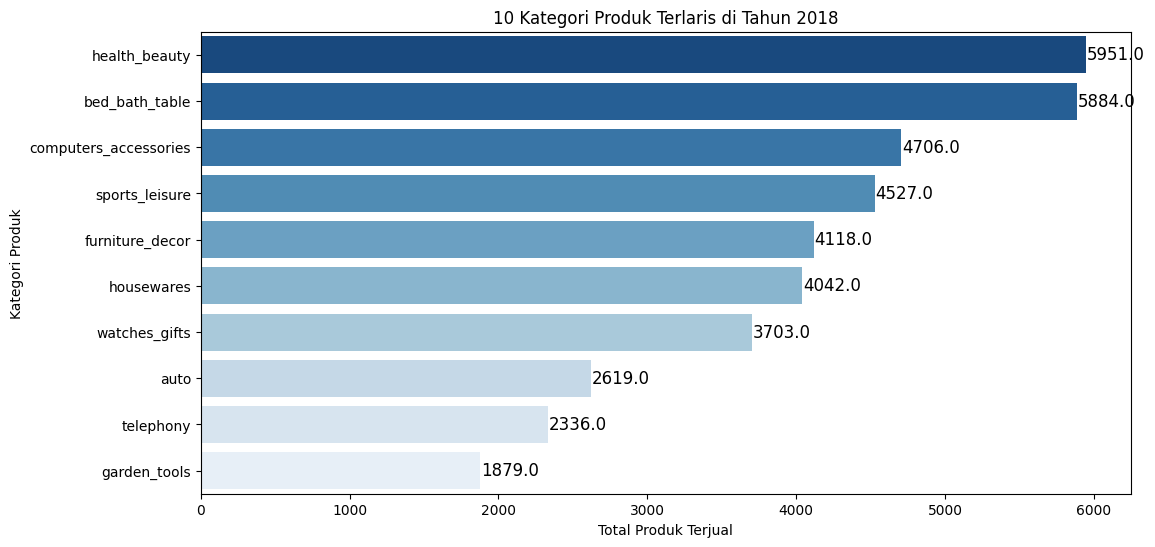

In [121]:
order_data["order_purchase_timestamp"] = pd.to_datetime(order_data["order_purchase_timestamp"])

order_products_2018 = order_data[order_data["order_purchase_timestamp"].dt.year == 2018] \
    .merge(product, on="product_id", how="left")

category_sales = order_products_2018.groupby("product_category_name_english")["order_item_id"].sum().reset_index()

top_categories = category_sales.sort_values(by="order_item_id", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y=top_categories["product_category_name_english"], x=top_categories["order_item_id"], palette="Blues_r")

for index, value in enumerate(top_categories["order_item_id"]):
    ax.text(value + 5, index, str(value), color='black', ha="left", va="center", fontsize=12)

plt.xlabel("Total Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk Terlaris di Tahun 2018")
plt.show()

### Pertanyaan 2: Bagaimana pengaruh review pelanggan terhadap tren penjualan produk dalam 1 tahun terakhir?

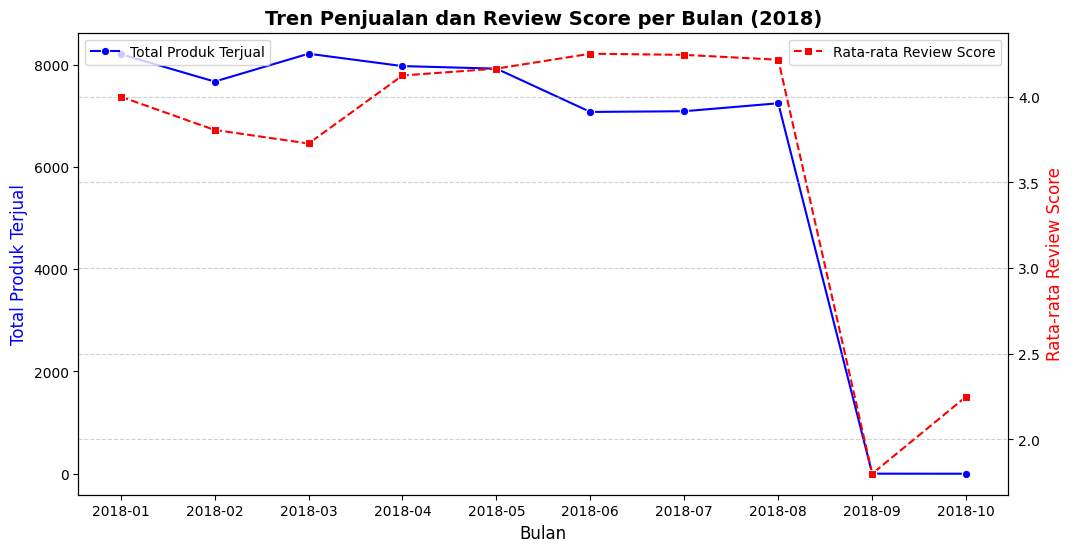

In [122]:
order_data["order_purchase_timestamp"] = pd.to_datetime(order_data["order_purchase_timestamp"])

order_2018 = order_data[order_data["order_purchase_timestamp"].dt.year == 2018]

# Agregasi data per bulan: total produk terjual dan rata-rata review score
monthly_sales = order_2018.groupby(order_2018["order_purchase_timestamp"].dt.to_period("M")).agg({
    "order_item_id": "sum",  # Total produk terjual
    "review_score": "mean"   # Rata-rata skor review
}).reset_index()

monthly_sales["order_purchase_timestamp"] = monthly_sales["order_purchase_timestamp"].astype(str)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=monthly_sales, 
    x="order_purchase_timestamp", 
    y="order_item_id", 
    marker="o", 
    color="b", 
    label="Total Produk Terjual", 
    ax=ax1
)

ax2 = ax1.twinx()
sns.lineplot(
    data=monthly_sales, 
    x="order_purchase_timestamp", 
    y="review_score", 
    marker="s", 
    color="r", 
    linestyle="dashed", 
    label="Rata-rata Review Score", 
    ax=ax2
)

ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Total Produk Terjual", fontsize=12, color="b")
ax2.set_ylabel("Rata-rata Review Score", fontsize=12, color="r")
plt.title("Tren Penjualan dan Review Score per Bulan (2018)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Analisis Lanjutan : Apakah ada hubungan antara wilayah pengiriman dan total produk yang terjual?

/tmp/ipykernel_200843/2848159483.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_states, x="customer_state", y="order_item_id", palette="viridis")


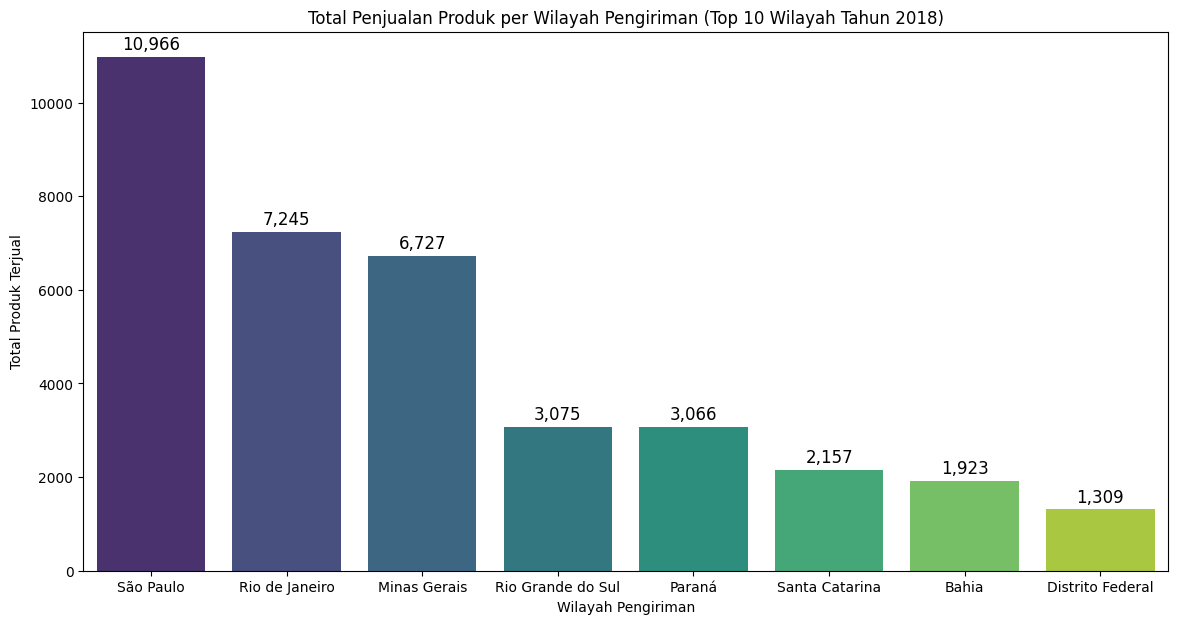

In [124]:
state_mapping = {
    'BA': 'Bahia',
    'DF': 'Distrito Federal',
    'SP': 'São Paulo',
    'RJ': 'Rio de Janeiro',
    'MG': 'Minas Gerais',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina',
    'PE': 'Pernambuco',
    'CE': 'Ceará',
}

region_sales_data = order_data.merge(
    customer_df[['customer_id', 'customer_state']], 
    on='customer_id', 
    how='left'
)

region_sales_data["order_purchase_timestamp"] = pd.to_datetime(region_sales_data["order_purchase_timestamp"])
region_sales_data = region_sales_data[region_sales_data["order_purchase_timestamp"].dt.year == 2018]
total_sales_by_state = region_sales_data.groupby("customer_state")["order_item_id"].sum().reset_index()
total_sales_by_state["customer_state"] = total_sales_by_state["customer_state"].map(state_mapping)
top_10_states = total_sales_by_state.sort_values(by="order_item_id", ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=top_10_states, x="customer_state", y="order_item_id", palette="viridis")
plt.xlabel("Wilayah Pengiriman")
plt.ylabel("Total Produk Terjual")
plt.title("Total Penjualan Produk per Wilayah Pengiriman (Top 10 Wilayah Tahun 2018)")

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 9), textcoords='offset points')

plt.show()

**Insight:**
- Jika dikaitkan antara penjualan dengan wiliayah customer ternyata ada hubungannya. Terlihat pada visualisasi tersebut menunjukkan bahwa daerah Sao Paulo memiliki total produk yang terjual ke customer terbanyak daripada derah-daerah sekitarnya.

## Conclusion

- Pada Visualisasi data di pertanyaan 1 terlihat bahwa produk dalam kategori heatlg_beauty memimpin tren penjualan di tahuun 2018 sebanyak 5951 penjualan. Disusul  dengan produk dengan kategori bed_bath_table yang berhasil terjual sebanyak 5884 item di tahun 2018.
- Pada visualisasi data di pertanyaan ke 2 ternyata pada pertanyaan 2 tren penjualan berpengaruh pada review. Terlihat pada bulan 9 ketika penjualan mengalami penurunan maka review pun turun